/Users/guy.yanko/dev/hired_score_movie_classifier/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guy.yanko/dev/hired_score_movie_classifier/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guy.yanko/dev/hired_score_movie_classifier/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guy.yanko/dev/hired_score_movie_classifier/venv/

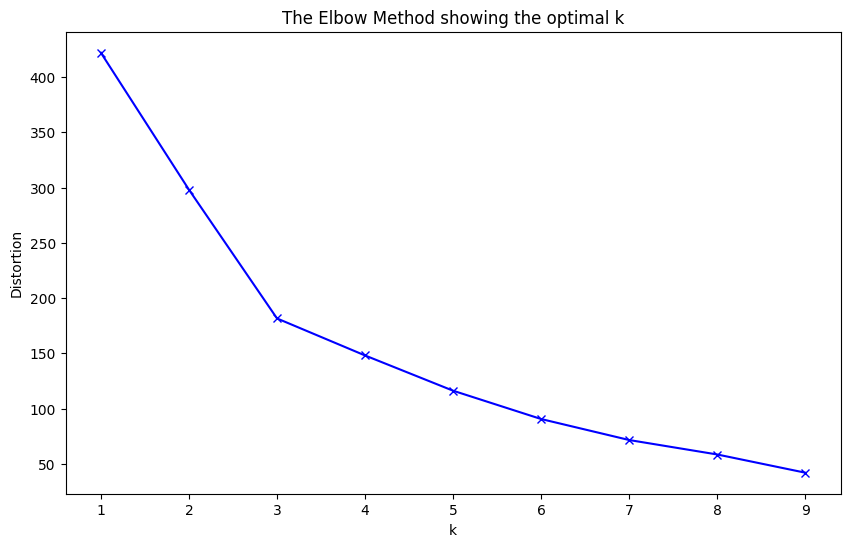

In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from collections import defaultdict

data = pd.read_csv('data/processed_data.csv')

data['genres'] = data['genres'].apply(ast.literal_eval)

genre_counts = defaultdict(int)

for genres in data['genres']:
    for genre in genres:
        genre_counts[genre] += 1

genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

genre_counts_df = genre_counts_df.sort_values('Count')

genre_counts_df['Cumulative Count'] = genre_counts_df['Count'].cumsum()

data_elbow = genre_counts_df['Count'].values.reshape(-1, 1)

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_elbow)
    kmeanModel.fit(data_elbow)
    distortions.append(
        sum(np.min(cdist(data_elbow, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_elbow.shape[0])

# Plot the elbow
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [2]:
data = pd.read_csv('data/processed_data.csv')

data['genres'] = data['genres'].apply(ast.literal_eval)

genre_counts = defaultdict(int)

for genres in data['genres']:
    for genre in genres:
        genre_counts[genre] += 1

total_genres = len(genre_counts)
total_movies = len(data)

expected_frequency = total_movies / total_genres

significant_genres = {genre: count for genre, count in genre_counts.items() if count > expected_frequency}

print(f"total significant genres: {len(significant_genres)}")

significant_genres

total significant genres: 113


{'Drama': 13547,
 'Thriller': 4594,
 'Mystery': 1487,
 'Crime Fiction': 3046,
 'Crime Thriller': 1203,
 'Action': 4137,
 'LGBT': 595,
 'Filipino Movies': 156,
 'World cinema': 3629,
 'Romantic comedy': 1494,
 'Romance Film': 4738,
 'Indie': 2627,
 'Comedy': 7431,
 'Musical': 1759,
 'Black-and-white': 2676,
 'Black comedy': 577,
 'Sex comedy': 169,
 'Comedy-drama': 874,
 'Japanese Movies': 919,
 'Suspense': 458,
 'Television movie': 455,
 'Sports': 467,
 'Family Film': 2265,
 'Family Drama': 540,
 'Action/Adventure': 2494,
 'Science Fiction': 1619,
 'Western': 740,
 'Fantasy': 1419,
 'Anime': 201,
 'Animation': 1722,
 'Comedy film': 1305,
 'Short Film': 2282,
 'Adventure': 2231,
 'Biopic [feature]': 260,
 'War film': 1087,
 'Horror': 2867,
 'Silent film': 872,
 'Crime Drama': 285,
 'Martial Arts Film': 471,
 'Chinese Movies': 688,
 'Gangster Film': 242,
 'Heist': 103,
 'Music': 262,
 "Children's": 279,
 'Monster movie': 108,
 'Creature Film': 230,
 'Psychological thriller': 797,
 'Spy':